In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
categorical_x = ['island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# # y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [9]:
# escalador = StandardScaler()
# escalador.fit(X_train)

# X_train = escalador.transform(X_train)
# X_test = escalador.transform(X_test)

## Model implementation

In [10]:
rf_model = RandomForestClassifier()

In [11]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
base_pred = rf_model.predict(X_test)

## Evaluation

In [13]:
y_pred = rf_model.predict(X_test)

In [14]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [15]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 22]], dtype=int64)

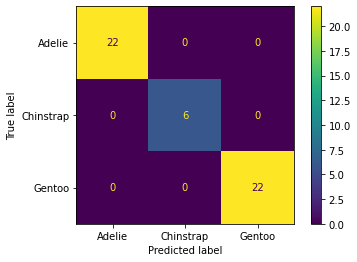

In [16]:
metrics.plot_confusion_matrix(rf_model, X_test,y_test)

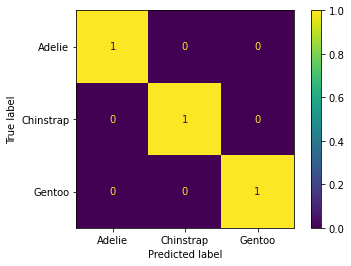

In [17]:
metrics.plot_confusion_matrix(rf_model, X_test,y_test,normalize='true')

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00         6
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [19]:
rf_model.feature_importances_

array([0.10675262, 0.02234696, 0.00862959, 0.34281454, 0.17558833,
       0.21957373, 0.12429422])

In [20]:
df_feature_importance = pd.DataFrame(index=X.columns,data=rf_model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.342815
flipper_length_mm,0.219574
bill_depth_mm,0.175588
body_mass_g,0.124294
island_Dream,0.106753
island_Torgersen,0.022347
sex_Male,0.008630


## Grid Search

In [21]:
rf_model = RandomForestClassifier()

In [22]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]

parametros = {'n_estimators':n_estimators,
              'max_features':max_features,
              'bootstrap':bootstrap,}

In [23]:
grid_model = GridSearchCV(rf_model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [24]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='accuracy')

In [25]:
grid_model.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 128}

In [26]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [27]:
metrics.accuracy_score(y_test,y_pred)

1.0

In [28]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  0,  0],
       [ 0,  6,  0],
       [ 0,  0, 22]], dtype=int64)

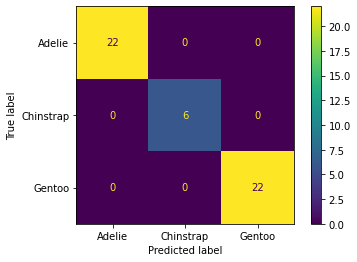

In [29]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

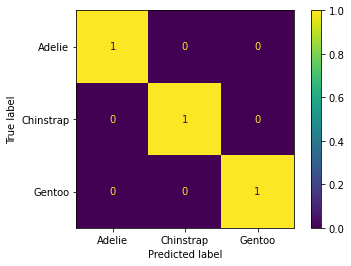

In [30]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        22
   Chinstrap       1.00      1.00      1.00         6
      Gentoo       1.00      1.00      1.00        22

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [32]:
grid_model.best_estimator_.feature_importances_

array([0.1120982 , 0.017146  , 0.00835374, 0.36541962, 0.17509747,
       0.22502107, 0.0968639 ])

In [33]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.365420
flipper_length_mm,0.225021
bill_depth_mm,0.175097
island_Dream,0.112098
body_mass_g,0.096864
island_Torgersen,0.017146
sex_Male,0.008354


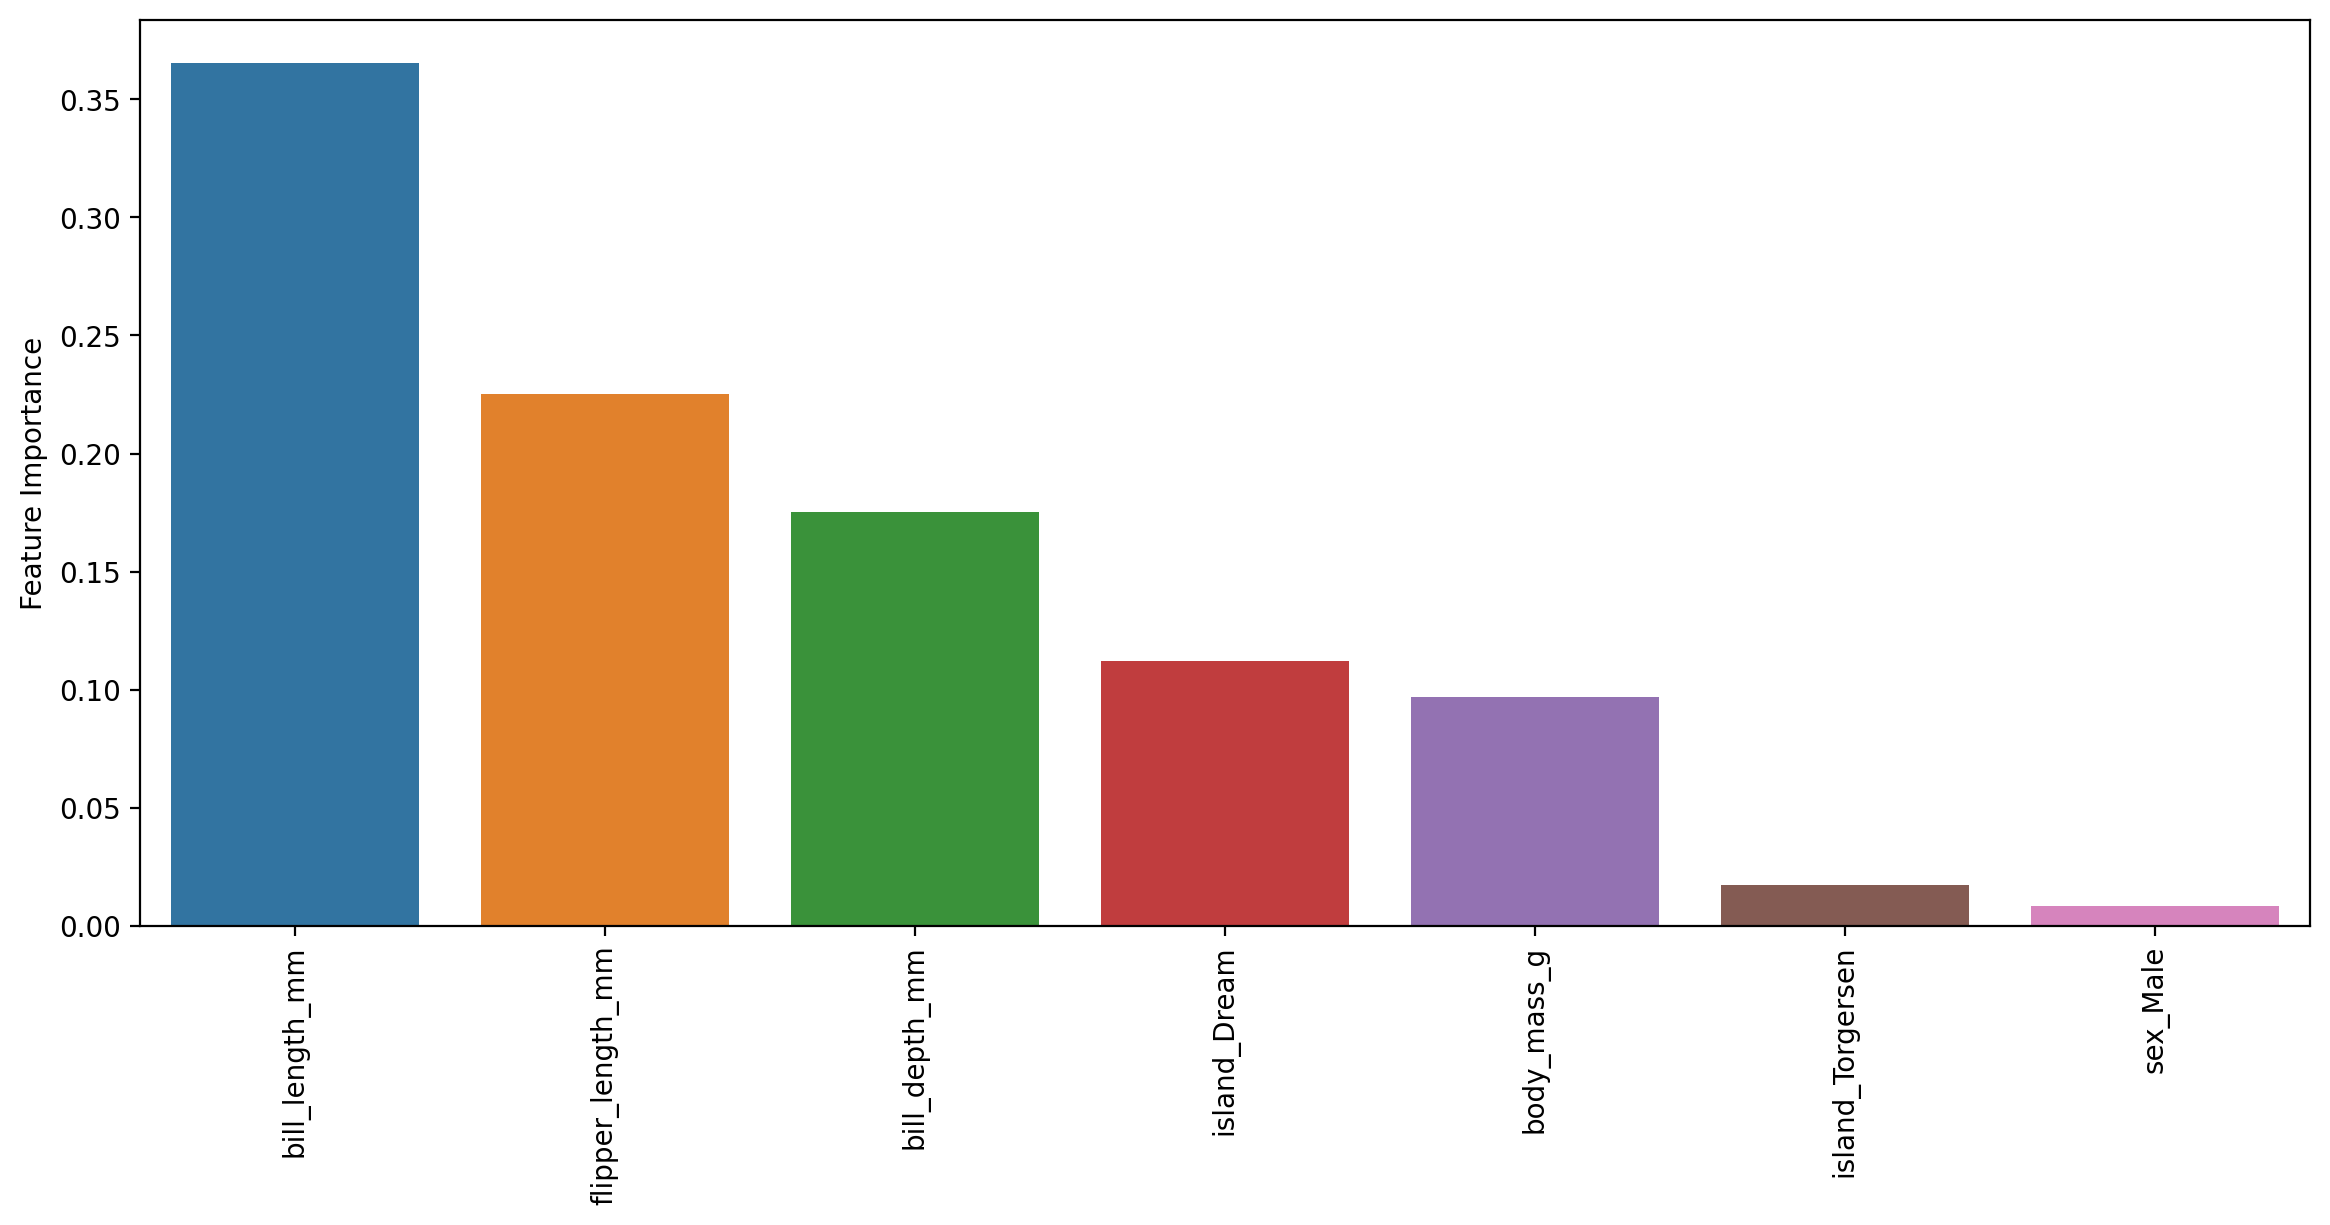

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [35]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = RandomForestClassifier( n_estimators=n,bootstrap=True,max_features= 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

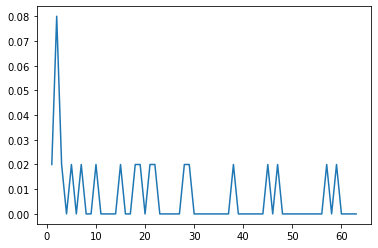

In [36]:
plt.plot(range(1,64),errors)

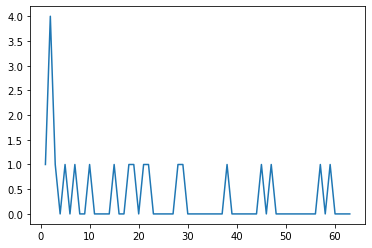

In [37]:
plt.plot(range(1,64),misclassifications)